# Least Squares Approximation

We generate a random matrix $A$ and vector $b$, and find the least squares approximation to it (i.e., the vector $x$ such that $\lVert Ax-b \rVert_2$ is minimized).

In [74]:
import numpy as np
from time import perf_counter
from matplotlib import pyplot as plt
from tqdm import tqdm

In [75]:
dims = np.arange(100, 2000, step=50)

In [76]:
times = []

for n in tqdm(dims):
    m = 2 * n
    
    A = np.random.randn(m,n)
    b = np.random.randn(m,1)

    start = perf_counter()

    q,r = np.linalg.qr(A)
    qt = np.transpose(q)
    c = qt @ b

    rinv = np.linalg.inv(r)
    xls = rinv @ c

    end = perf_counter()
    times.append(end - start)

100%|██████████| 38/38 [00:40<00:00,  1.06s/it]


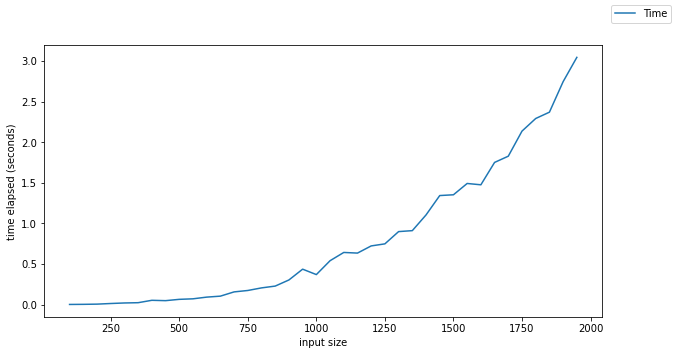

In [77]:
fig, ax = plt.subplots(figsize=(10,5))

ax.set_xlabel('input size')

ax.plot(dims, times, label='Time')
ax.set_ylabel('time elapsed (seconds)')

fig.legend(loc='upper right')